In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
import math as m
import random
import Bandit as bnd
import ContextBandit as cb

In [3]:
def KNN_UCB(bandit,X, theta, phi): ##X:context vector
    n = len(X)
    regrets = []
    n_arms = bandit.k #number of arms
    actions = []
    rewards = []
    assert(n >= n_arms)
    for a in range(n_arms): ##play each arm once regardless of context
        reward = bandit.pull(a, X[a])
        rewards.append(reward)
        actions.append(a)
        regrets.append(bandit.regret)
    for t in range(n_arms,n,1):
        distances= cdist(X[:t], [X[t]], 'Euclidean')
        distances = [dist for sublist in distances for dist in sublist]
        k_a = np.zeros(n_arms)
        index = np.zeros(n_arms) ## to store I_t,k
        for a in range(n_arms): ##evaluate k_a for all a
            U = np.zeros(t)
            for k in range(1,t+1, 1): ##calculate uncertainty on [t-1]
                k_least = np.argpartition(distances, k-1)[:k] ## indices of k nearest neighbours
                N = sum(np.array(actions)[k_least] == a) ##N_t,k
                U[k-1] = m.sqrt(theta* m.log(t)/N) + phi(t) * distances[k_least[-1]] if (N!=0) else phi(t) * distances[k_least[-1]]
            k_a[a] = np.argmin(U) + 1
            k_least = np.argpartition(distances, int(k_a[a]-1))[:int(k_a[a])]
            N = sum(np.array(actions)[k_least] == a)
            S = sum(np.array(rewards)[k_least] * (np.array(actions)[k_least] == a))
            f_hat = S/N if (N!=0) else 0
            index[a] = f_hat + m.sqrt(theta* m.log(t)/N) + phi(t) * distances[k_least[-1]] if(N!=0) else f_hat + phi(t) * distances[k_least[-1]]
        arm = np.argmax(index)
        reward = bandit.pull(arm, X[t])
        regrets.append(bandit.regret)
        actions.append(arm)
        rewards.append(reward)
    return actions, rewards, regrets

## Case 1 : Linear

$E[X_{t,a} | c_{t}] = c_t^T . \theta_a^*$ for some unknown coeffiecient vector $\theta$

In [22]:
bandit = bnd.LinContextGauss([[0.9,-0.5,0.7],[-0.9,0.8,0.2]])
cv = np.linspace((2,0,3), (0,6,2), 1000)
actions,rewards,regrets = KNN_UCB(bandit, cv, 0.5, lambda a : 1)

Text(0, 0.5, '$R_n$')

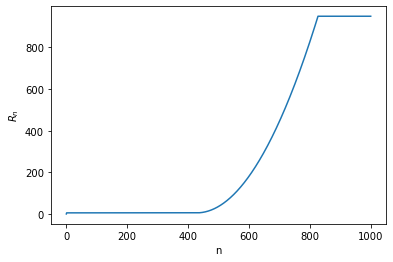

In [43]:
plt.plot(regrets)
plt.xlabel("n")
plt.ylabel("$R_n$")

### Case 2: $ X_i \in [0,1]^d,  \eta_a(x)=\prod_{j=1}^d \sin(\theta_0 x_j+\theta_1 *a)$ for some parameters $\theta_0$ and $\theta_1$

I will start exploring with noiseless rewards

1) Generate N d-dimensional context vectors from Uniform($[0,1]^d$), e.g. d = 4


In [120]:
X = np.random.uniform(0,1, size = (1000,4))

2) Define your reward functions, e.g.:

In [121]:
lambdas = [lambda x: np.prod([m.sin(xs * m.pi/3) for xs in x]),
           lambda x: np.prod([m.sin(xs* m.pi/6 + m.pi/4) for xs in x])]

3)Define bandit:

In [122]:
bandit = cb.ContextBandit(lambdas)

4) Simulate using KNN:

In [123]:
actions,rewards,regrets = KNN_UCB(bandit,X, 0.5, lambda a : 1)

503


Text(0, 0.5, '$R_n$')

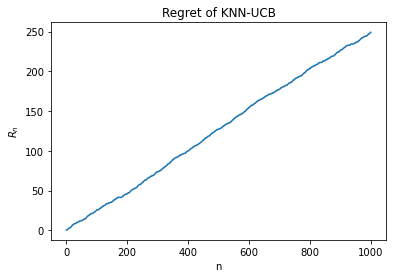

In [129]:
plt.plot(regrets)
print(np.sum(np.subtract(regrets[1:], regrets[0:-1]) == 0 ))
plt.title("Regret of KNN-UCB")
plt.xlabel("n")
plt.ylabel("$R_n$")

## Trial #2

In [15]:
X = np.random.uniform(0,1, size = (600,4))
lambdas = [lambda x: np.prod([m.sin(2* xs * m.pi) for xs in x]),
           lambda x: np.prod([m.sin(2* xs * m.pi + m.pi/2) for xs in x])]
bandit = cb.ContextBandit(lambdas)
actions,rewards,regrets2 = KNN_UCB(bandit,X, 0.5, lambda a : 1)

Stored 'regrets2' (list)


299

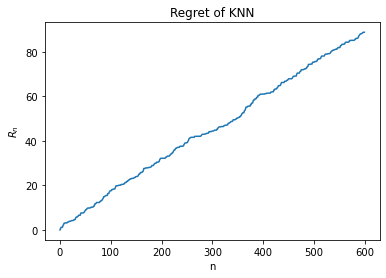

In [19]:
%store regrets2
plt.plot(regrets2)
plt.xlabel("n")
plt.ylabel("$R_n$")
plt.title("Regret of KNN")
np.sum(np.subtract(regrets2[1:], regrets2[0:-1]) == 0 )

## Trial #3

In [46]:
X = np.random.uniform(0,1, size = (1000,4))
lambdas = [lambda x: np.prod([m.sin(xs * m.pi) for xs in x]),
           lambda x: np.prod([m.sin(xs * m.pi/2) for xs in x])]
bandit = cb.ContextBandit(lambdas)
actions,rewards,regrets3 = KNN_UCB(bandit,X, 0.5, lambda a : 1)

Stored 'regrets3' (list)


635

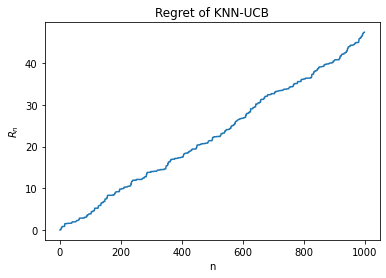

In [48]:
%store regrets3
plt.plot(regrets3)
plt.xlabel("n")
plt.ylabel("$R_n$")
plt.title("Regret of KNN-UCB")
np.sum(np.subtract(regrets3[1:], regrets3[0:-1]) == 0 )

## case 3
$Z_i~from~ Unif((0,1)^d), \mathbb{E}(Y_i|Z_i=(z_{ij})) =  \prod_{j=1}^d \sin(\theta_0 z_{ij}+\theta_1 *a),  X_i = h(Z_i);
\\ h:R^d \rightarrow R^D$

In [ ]:
Z = np.random.uniform(0,1, size = (500,3))


In [ ]:


Y = np.random